In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

data = pd.read_csv('~/Downloads/data3a.csv')
fp = fm.FontProperties(fname='/Library/Fonts/Yu Gothic Medium.otf', size=12)

In [2]:
data.info()
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB

                y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000


/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


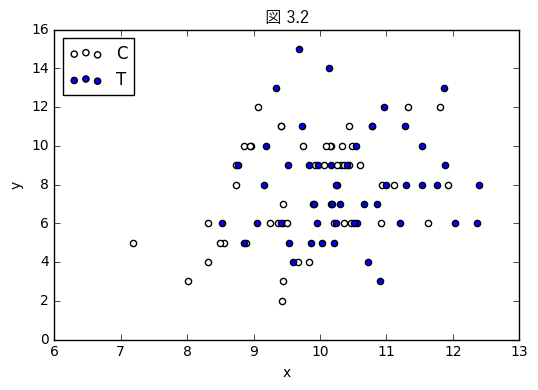

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data.x[data.f=='C'], data.y[data.f=='C'], label='C', c='w')
ax.scatter(data.x[data.f=='T'], data.y[data.f=='T'], label='T')
ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('図 3.2', fontproperties=fp)
fig.show()

/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


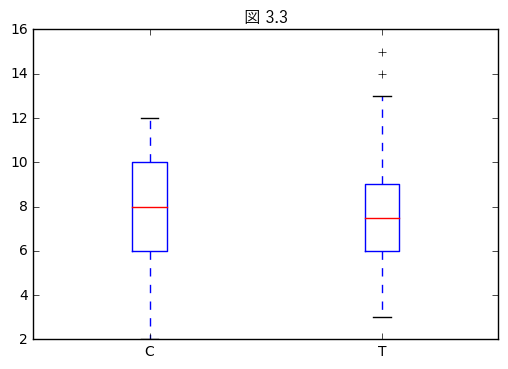

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([data.y[data.f=='C'], data.y[data.f=='T']])
ax.set_xticklabels(['C', 'T'])
ax.set_title('図 3.3', fontproperties=fp)
fig.show()

/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


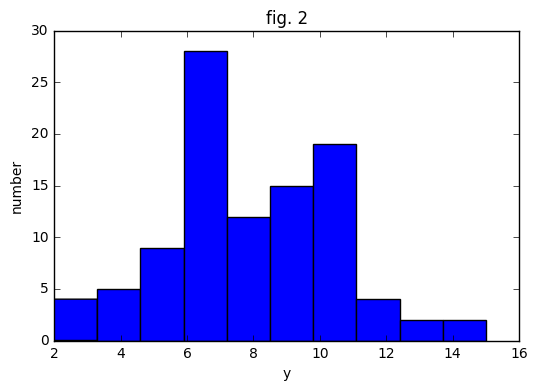

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data.y)
ax.set_xlabel('y')
ax.set_ylabel('number')
ax.set_title('fig. 2')
fig.show()

- Gaussian(identity)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   6.59946204749
Method:                          IRLS   Log-Likelihood:                -235.23
Date:                Tue, 22 Nov 2016   Deviance:                       646.75
Time:                        12:11:09   Pearson chi2:                     647.
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8483      2.597      0.712      0.477        -3.241     6.938
x              0.5929      0.25

/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


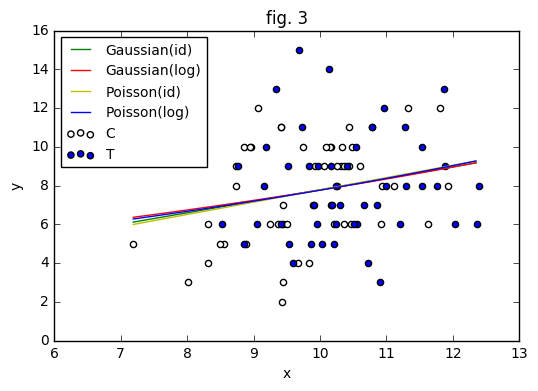

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 正規分布、恒等リンク関数
fit_gaussian = smf.glm(
    formula='y ~ x', data=data, family=sm.families.Gaussian())
# 正規分布、対数リンク関数
fit_gaussian_log = smf.glm(
    formula='y ~ x', data=data,
    family=sm.families.Gaussian(link=sm.families.links.log)
)
# ポワソン分布、恒等リンク関数
fit_poisson_identity = smf.glm(
    formula='y ~ x', data=data,
    family=sm.families.Poisson(link=sm.families.links.identity)
)
# ポワソン分布、対数リンク関数
fit_poisson = smf.glm(
    formula='y ~ x', data=data, family=sm.families.Poisson())
print('- Gaussian(identity)')
print(fit_gaussian.fit().summary())
print()
print('- Gaussian(log)')
print(fit_gaussian_log.fit().summary())
print()
print('- Poisson(identity)')
print(fit_poisson_identity.fit().summary())
print()
print('- Poisson(log)')
print(fit_poisson.fit().summary())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xrange = np.arange(min(data.x), max(data.x), (max(data.x) - min(data.x)) / 100)
ax.scatter(data.x[data.f=='C'], data.y[data.f=='C'], label='C', c='w')
ax.scatter(data.x[data.f=='T'], data.y[data.f=='T'], label='T')
ax.plot(xrange, 1.8483 + 0.5929 * xrange, c='g', label='Gaussian(id)')
ax.plot(xrange, np.exp(1.3395 + 0.071 * xrange), c='r', label='Gaussian(log)')
ax.plot(xrange, 1.4241 + 0.6349 * xrange, c='y', label='Poisson(id)')
ax.plot(xrange, np.exp(1.2917 + 0.0757 * xrange), label='Poisson(log)')
ax.legend(loc='upper left', fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('fig. 3')
fig.show()

- Gaussian(identity)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   6.65220528379
Method:                          IRLS   Log-Likelihood:                -235.12
Date:                Tue, 22 Nov 2016   Deviance:                       645.26
Time:                        12:11:10   Pearson chi2:                     645.
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6169      2.653      0.610      0.542        -3.582     6.816
f[T.T]        -0.2538      0.53

/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


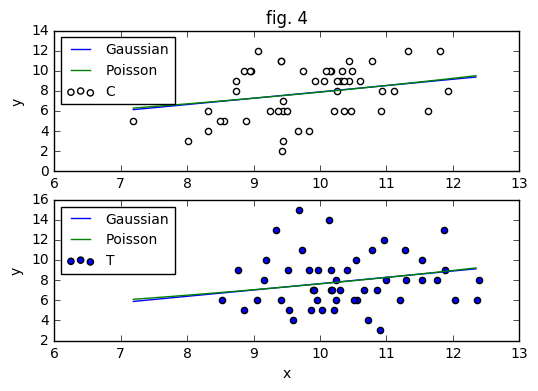

In [7]:
fit_gaussian= smf.glm(formula='y ~ x + f', data=data, family=sm.families.Gaussian())
fit_poisson = smf.glm(formula='y ~ x + f', data=data, family=sm.families.Poisson())
print('- Gaussian(identity)')
print(fit_gaussian.fit().summary())
print()
print('- Poisson(log)')
print(fit_poisson.fit().summary())

xrange = np.arange(min(data.x), max(data.x), (max(data.x) - min(data.x)) / 100)
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(data.x[data.f=='C'], data.y[data.f=='C'], label='C', c='w')
ax1.plot(xrange, 1.6169 + 0.6284 * xrange, label='Gaussian')
ax1.plot(xrange, np.exp(1.2631 + 0.0801 * xrange), label='Poisson')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('fig. 4')
ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(data.x[data.f=='T'], data.y[data.f=='T'], label='T')
ax2.plot(xrange, 1.6169 + 0.6284 * xrange - 0.2538, label='Gaussian')
ax2.plot(xrange, np.exp(1.2631 + 0.0801 * xrange -  0.032), label='Poisson')
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.show()